# Performance Evaluation "Macro"benchmarks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

In [2]:
data = pd.read_csv('maxisign/measurement_maxisign.tsv', delimiter='\t')
data = data.append(pd.read_csv('password_check/measurement_password_check.tsv', delimiter='\t'))
data.drop(columns='Unnamed: 0', inplace=True)
data.sort_values(['program', 'operation', 'enclaved'], inplace=True)

data

,cmd,descr,duration,enclaved,operation,program,size,time
0,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in debug mode ...,21161.932707,False,debug,build maxisign,NaN,2021-08-23 08:27:25.113721
1,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in debug mode ...,21837.277889,False,"debug, codegen-units=1",build maxisign,NaN,2021-08-23 08:27:46.960001
4,"['make', 'all']",Time spent building the program in debug mode,65775.629282,True,"debug, codegen-units=1",build maxisign,NaN,2021-08-23 08:30:55.890963
2,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in release mod...,55997.244120,False,release,build maxisign,NaN,2021-08-23 08:28:42.965638
3,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in release mod...,67073.349476,False,"release, codegen-units=1",build maxisign,NaN,2021-08-23 08:29:50.045702
...,...,...,...,...,...,...,...,...
85,['build/password_check'],Time from after program startup to having logg...,76.155000,True,login,password_check,100.0,2021-08-21 13:25:41.557382
93,['build/password_check'],Time from after program startup to having logg...,75.976000,True,login,password_check,1.0,2021-08-21 13:25:52.329409
95,['build/password_check'],Time from after program startup to having logg...,76.123000,True,login,password_check,100.0,2021-08-21 13:26:15.853430
103,['build/password_check'],Time from after program startup to having logg...,75.981000,True,login,password_check,1.0,2021-08-21 13:26:26.629404


## Build Performance

In [3]:
results = data[data['program'].str.contains('build')].copy()
results['duration'] = results['duration'].div(1000)
results

,cmd,descr,duration,enclaved,operation,program,size,time
0,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in debug mode ...,21.161933,False,debug,build maxisign,NaN,2021-08-23 08:27:25.113721
1,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in debug mode ...,21.837278,False,"debug, codegen-units=1",build maxisign,NaN,2021-08-23 08:27:46.960001
4,"['make', 'all']",Time spent building the program in debug mode,65.775629,True,"debug, codegen-units=1",build maxisign,NaN,2021-08-23 08:30:55.890963
2,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in release mod...,55.997244,False,release,build maxisign,NaN,2021-08-23 08:28:42.965638
3,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in release mod...,67.073349,False,"release, codegen-units=1",build maxisign,NaN,2021-08-23 08:29:50.045702
5,"['make', 'all']",Time spent building the program in release mode,190.235073,True,"release, codegen-units=1",build maxisign,NaN,2021-08-23 08:34:06.183334
0,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in debug mode ...,36.477087,False,debug,build password_check,NaN,2021-08-21 13:07:00.184689
1,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in debug mode ...,41.118047,False,"debug, codegen-units=1",build password_check,NaN,2021-08-21 13:07:41.320885
4,"['make', 'all']",Time spent building the program in debug mode,95.707413,True,"debug, codegen-units=1",build password_check,NaN,2021-08-21 13:14:48.417006
2,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in release mod...,150.329492,False,release,build password_check,NaN,2021-08-21 13:10:11.667629


In [4]:
indexed_results = results.set_index(['operation', 'enclaved', 'program'])
indexed_results = indexed_results.unstack()
indexed_results

cmd  \
program                                                               build maxisign   
operation                enclaved                                                      
debug                    False     ['cargo', 'build', '--features=enclavization_b...   
debug, codegen-units=1   False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   
release                  False     ['cargo', 'build', '--features=enclavization_b...   
release, codegen-units=1 False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   

                                                                                      \
program                                                         build password_check   
operation                enclaved                                                      
debug                    False     ['cargo', 'build', '--features=enclavization_b...   
debug, codegen-units=1   False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   
release                  False     ['cargo', 'build', '--features=enclavization_b...   
release, codegen-units=1 False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   

                                                                               descr  \
program                                                               build maxisign   
operation                enclaved                                                      
debug                    False     Time spent building the program in debug mode ...   
debug, codegen-units=1   False     Time spent building the program in debug mode ...   
                         True          Time spent building the program in debug mode   
release                  False     Time spent building the program in release mod...   
release, codegen-units=1 False     Time spent building the program in release mod...   
                         True        Time spent building the program in release mode   

                                                                                      \
program                                                         build password_check   
operation                enclaved                                                      
debug                    False     Time spent building the program in debug mode ...   
debug, codegen-units=1   False     Time spent building the program in debug mode ...   
                         True          Time spent building the program in debug mode   
release                  False     Time spent building the program in release mod...   
release, codegen-units=1 False     Time spent building the program in release mod...   
                         True        Time spent building the program in release mode   

                                        duration                       \
program                           build maxisign build password_check   
operation                enclaved                                       
debug                    False         21.161933            36.477087   
debug, codegen-units=1   False         21.837278            41.118047   
                         True          65.775629            95.707413   
release                  False         55.997244           150.329492   
release, codegen-units=1 False         67.073349           180.977275   
                         True         190.235073           378.840527   

                                            size                       \
program                           build maxisign build password_check   
operation                enclaved                                       
debug                    False  

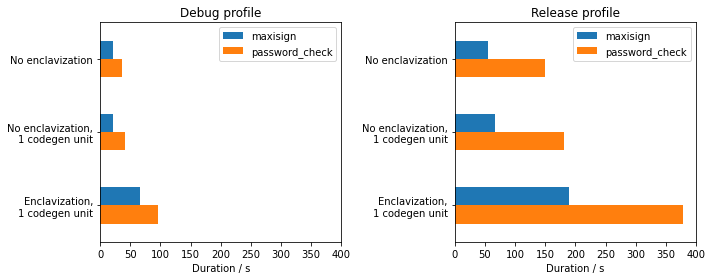

In [5]:
indexed_results_1 = indexed_results[indexed_results.index.get_level_values(0).str.contains('debug')]
indexed_results_2 = indexed_results[indexed_results.index.get_level_values(0).str.contains('release')]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
indexed_results_1['duration'].plot(kind='barh', ax=ax[0])
indexed_results_2['duration'].plot(kind='barh', ax=ax[1])

for i in range(2):
    ax[i].set_xlabel('Duration / s')
    ax[i].set_xlim(0, 400)
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(['No enclavization', 'No enclavization,\n1 codegen unit', 'Enclavization,\n1 codegen unit'])
    ax[i].yaxis.get_label().set_visible(False)
    ax[i].legend(['maxisign', 'password_check'], loc='upper right')

ax[0].set_title('Debug profile')
ax[1].set_title('Release profile')

fig.tight_layout()

In [6]:
fig.savefig('performance_build_macro.pdf', bbox_inches='tight', pad_inches=0)

## maxisign Runtime Performance

In [7]:
kb_data = data[data['program'] == 'maxisign'].copy()
kb_data['size'] = kb_data['size'] / 1024
results = kb_data.fillna(1).groupby(['operation', 'enclaved', 'size']).mean()
results

duration
operation enclaved size             
genkey    False    1.0        0.0969
          True     1.0        0.7111
sign      False    1.0        0.0831
                   10.0       0.1255
                   100.0      0.6689
                   512.0      2.9086
                   1024.0     5.7623
                   4096.0    23.0623
                   8192.0    45.9983
                   12288.0   69.1499
          True     1.0        0.6848
                   10.0       0.7391
                   100.0      1.4592
                   512.0      4.1141
                   1024.0     7.4424
                   4096.0    27.6309
                   8192.0    54.5859
                   12288.0   81.7023
verify    False    1.0        0.1081
                   10.0       0.1317
                   100.0      0.4844
                   512.0      1.8653
                   1024.0     3.6396
                   4096.0    14.4379
                   8192.0    28.8342
                   12288.0   43.2035
          True     1.0        0.1283
                   10.0       0.1568
                   100.0      0.5834
                   512.0      2.0280
                   1024.0     3.8156
                   4096.0    14.5977
                   8192.0    28.9318
                   12288.0   43.2967

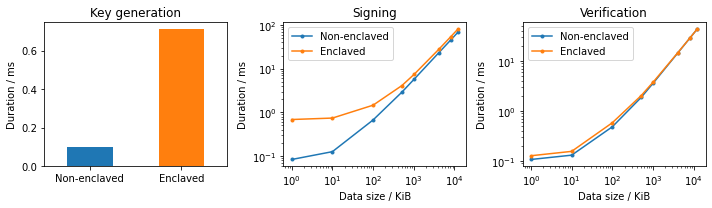

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

res = results[results.index.isin(['genkey'], level=0)]
res['duration'].plot(kind='bar', ax=ax[0], color=['#1f77b4', '#ff7f0e'])
ax[0].set_xticklabels(['Non-enclaved', 'Enclaved'], rotation=0)
ax[0].xaxis.get_label().set_visible(False)

unstacked_results = results.unstack()
for i, op in enumerate(['sign', 'verify'], start=1):
    res = unstacked_results[unstacked_results.index.isin([op], level=0)]
    res['duration'].T.plot(kind='line', style='.-', ax=ax[i], logx=True, logy=True)

for i in range(3):
    ax[i].set_ylabel('Duration / ms')
    
for i in range(1, 3):
    ax[i].set_xlabel('Data size / KiB')
    ax[i].legend(['Non-enclaved', 'Enclaved'], loc='upper left')

ax[0].set_title('Key generation')
ax[1].set_title('Signing')
ax[2].set_title('Verification')

fig.tight_layout()

In [9]:
fig.savefig('performance_run_maxisign.pdf', bbox_inches='tight', pad_inches=0)

## password_check Runtime Performance

In [10]:
results = data[data['program'] == 'password_check'].fillna(1).groupby(['operation', 'size', 'enclaved']).mean()
results

duration
operation  size  enclaved          
add        1.0   False      49.1169
                 True       75.9491
           100.0 False      48.9425
                 True       76.1849
initialize 1.0   False      50.1403
                 True       76.4968
login      1.0   False      49.7211
                 True       75.9719
           100.0 False      49.4665
                 True       76.0983

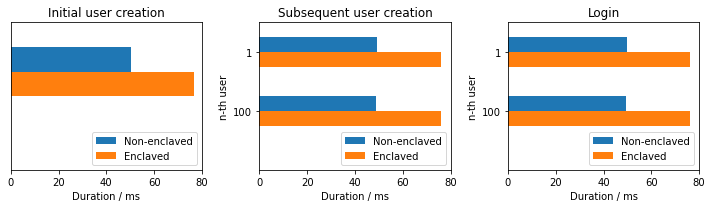

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for i, op in enumerate(['initialize', 'add', 'login']):
    res = results[results.index.isin([op], level=0)]
    # Make non-enclaved appear before enclaved and 1 before 100
    unstacked = res['duration'].unstack().sort_index(axis='columns', ascending=False).sort_values(['size'], ascending=False)
    # Swap first two default colors
    unstacked.plot(kind='barh', ax=ax[i], color=['#ff7f0e', '#1f77b4'])

for i in range(3):
    ax[i].set_xlabel('Duration / ms')
    ax[i].set_xlim(0, 80)
    # Swap legend order
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[::-1], ['Non-enclaved', 'Enclaved'], loc='lower right')

ax[0].get_yaxis().set_visible(False)
ax[0].set_ylim(-1, 0.5)
for i in range(1, 3):
    ax[i].set_ylim(-1, 1.5)
    ax[i].set_yticklabels([100, 1])
    ax[i].set_ylabel('n-th user')

ax[0].set_title('Initial user creation')
ax[1].set_title('Subsequent user creation')
ax[2].set_title('Login')

fig.tight_layout()

In [12]:
fig.savefig('performance_run_password_check.pdf', bbox_inches='tight', pad_inches=0)